<a href="https://colab.research.google.com/github/farkhanal/analisis-citra-wajah/blob/main/Validation_Set_(ArcFace).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install insightface onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1055399 sha256=e84c6328390c5312209c616cdba4d54ecd4fcd12b5142f6ceedf82424039cfee
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [ ]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import insightface
import pickle

# Direktori yang berisi gambar wajah untuk ekstraksi fitur
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/nist_2/val/'
output_embedding_file = '/content/drive/My Drive/Colab Notebooks/nist_2/validation_face_embeddings.pkl'

# Muat model ArcFace untuk ekstraksi fitur
model = insightface.app.FaceAnalysis(providers=['CPUExecutionProvider'])  # Ubah ke GPU jika ada
model.prepare(ctx_id=0, det_size=(640, 640))  # Sesuaikan dengan kebutuhan

# Dictionary untuk menyimpan embedding dan label
embeddings_dict = {}

# Loop melalui setiap subfolder di direktori validasi
for subfolder in os.listdir(validation_data_dir):
    subfolder_path = os.path.join(validation_data_dir, subfolder)

    if os.path.isdir(subfolder_path):
        embeddings_dict[subfolder] = []  # Inisialisasi daftar untuk setiap subfolder (label)

        # Loop melalui setiap gambar di subfolder
        for file_name in tqdm(os.listdir(subfolder_path), desc=f"Processing {subfolder}"):
            if file_name.endswith('.ppm'):
                file_path = os.path.join(subfolder_path, file_name)

                # Buka gambar dan konversi ke format RGB
                image = Image.open(file_path).convert('RGB')
                image_np = np.array(image)

                # Ekstraksi fitur menggunakan ArcFace
                faces = model.get(image_np)

                # Proses hanya jika ada wajah yang terdeteksi
                if faces:
                    # Ambil embedding dari wajah pertama yang terdeteksi
                    embedding = faces[0].embedding

                    # Simpan embedding di dictionary sesuai dengan label subfoldernya
                    embeddings_dict[subfolder].append(embedding)

# Simpan embedding dan label ke file untuk basis data
with open(output_embedding_file, 'wb') as f:
    pickle.dump(embeddings_dict, f)

print("Ekstraksi fitur selesai dan embedding wajah validasi disimpan sebagai basis data.")

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:05<00:00, 55003.00KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


Processing S429:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4
Processing S001: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]

Ekstraksi fitur selesai dan embedding wajah validasi disimpan sebagai basis data.


In [ ]:
!pip install scikit-learn matplotlib

In [ ]:
!pip install joblib

Akurasi training: 99.02%
Akurasi validasi: 96.97%


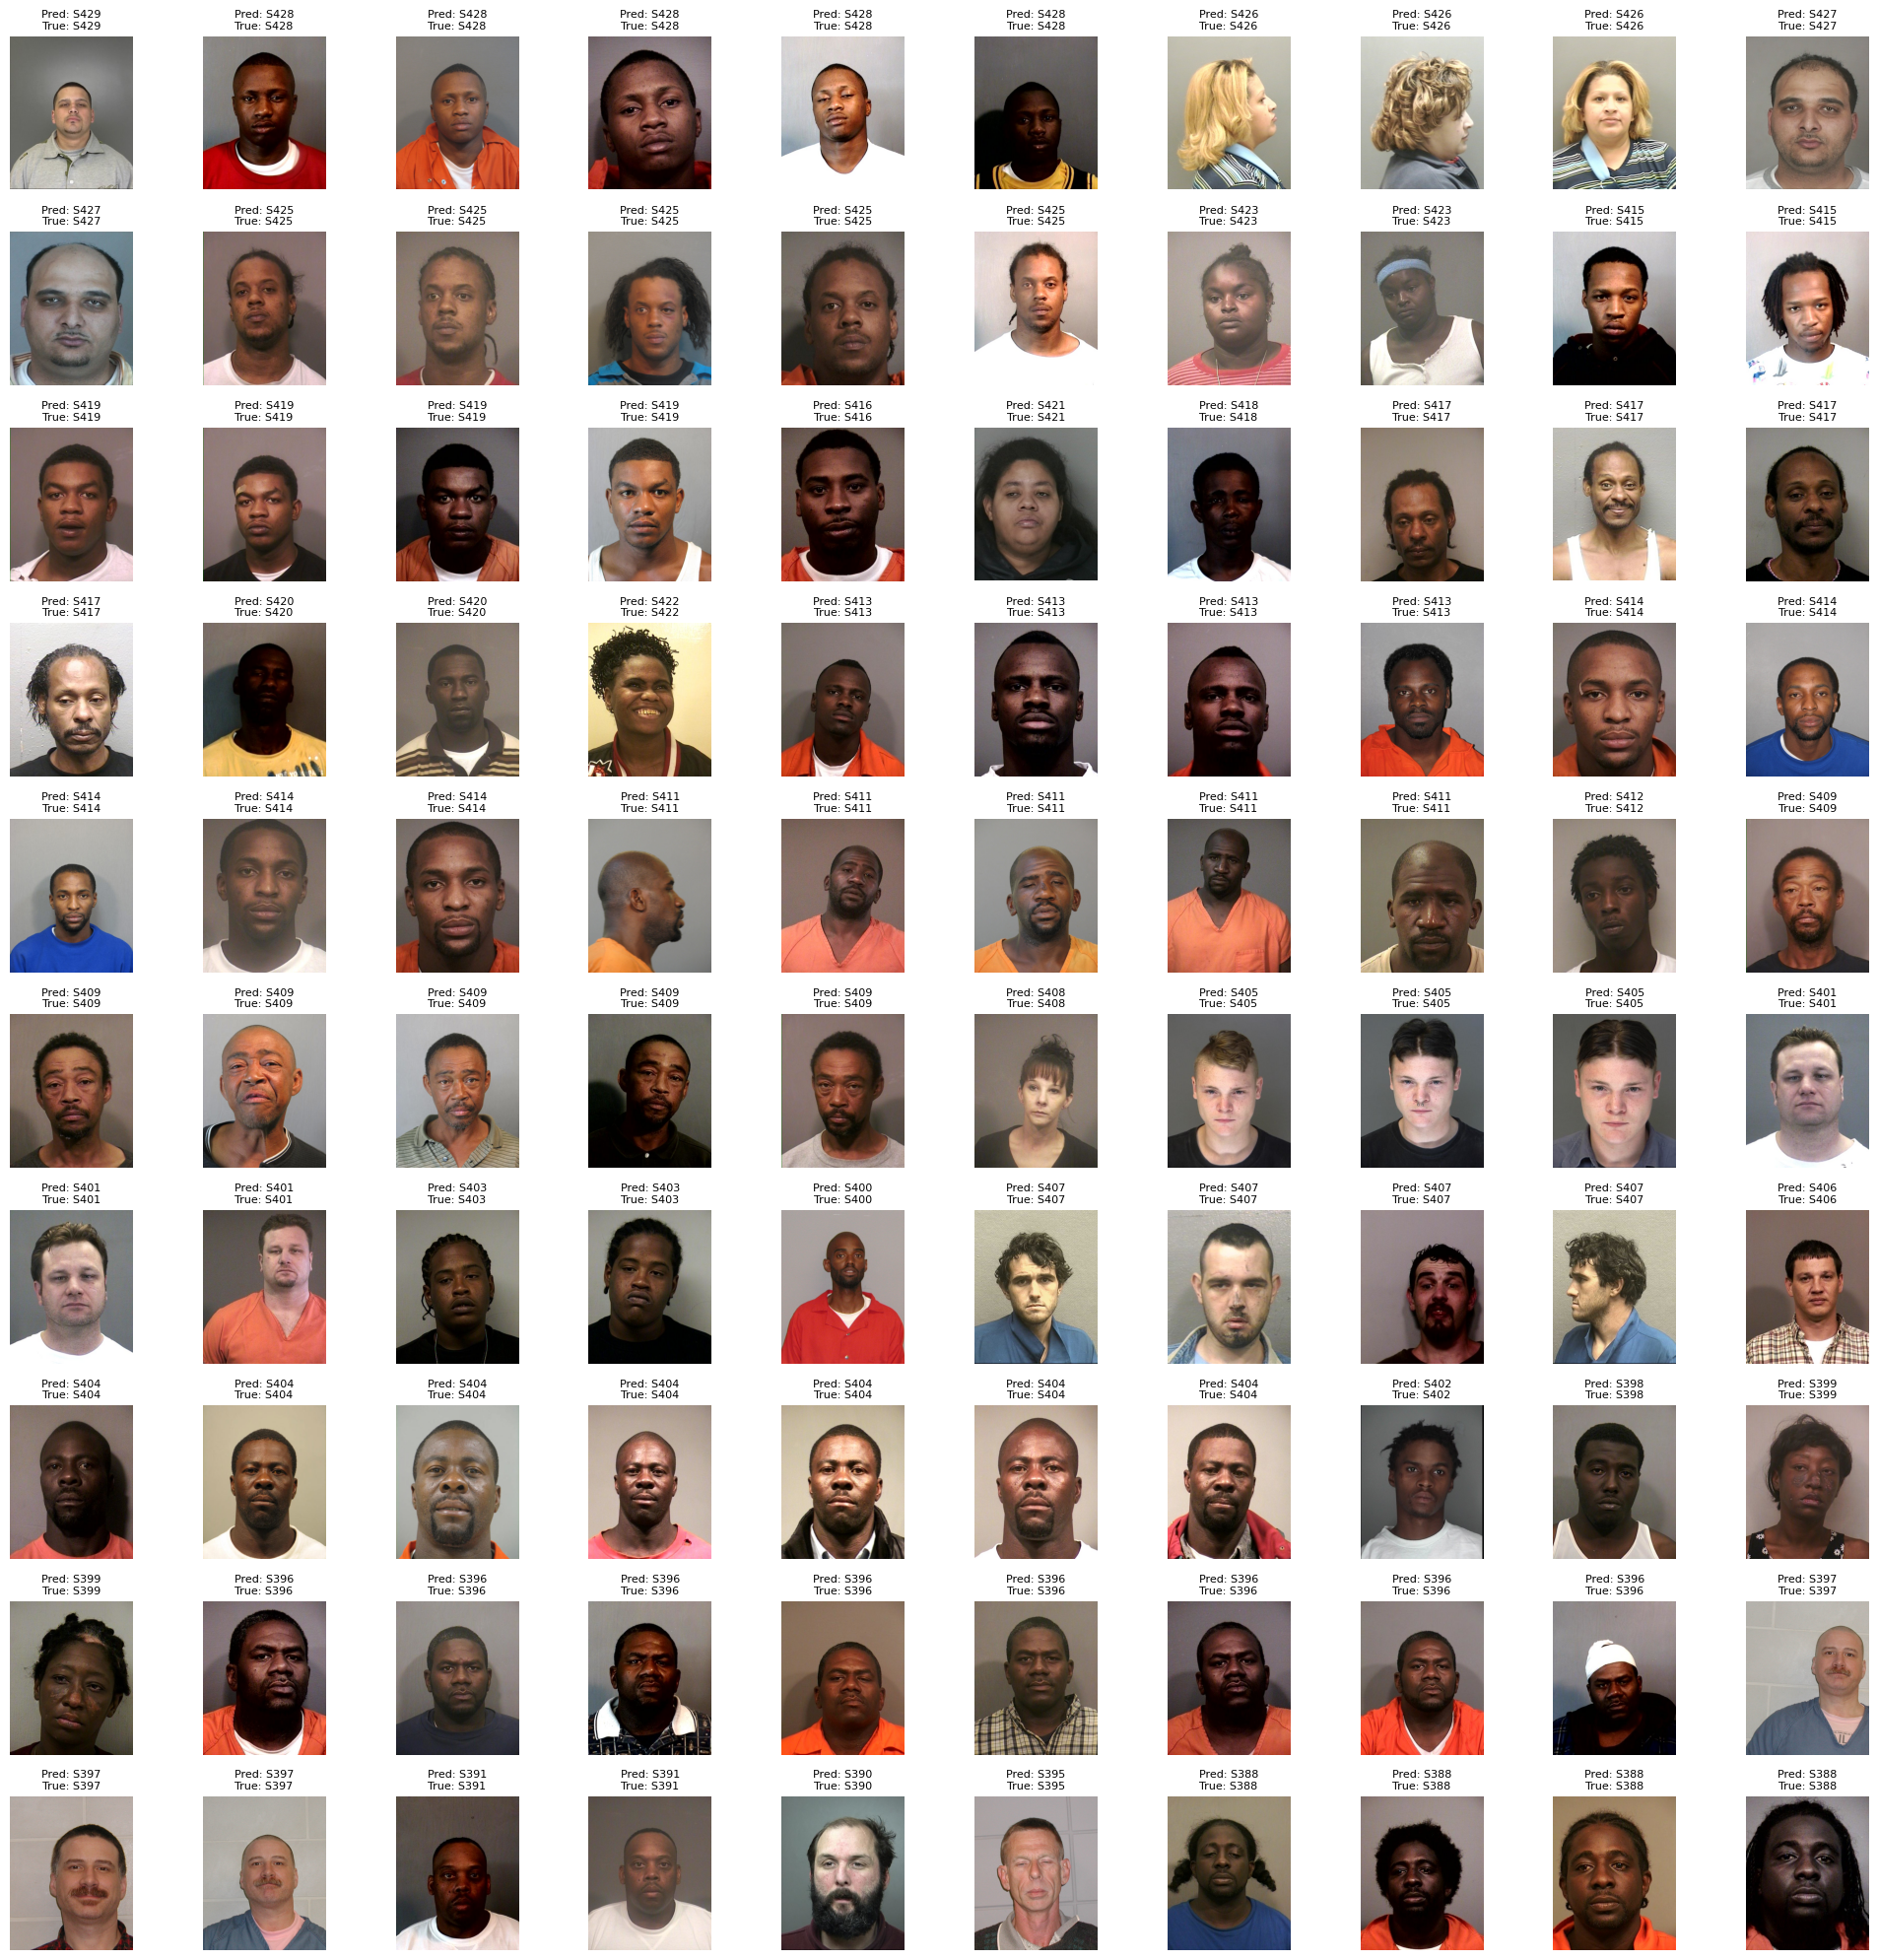

In [ ]:
import os
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from PIL import Image

# Muat embeddings wajah training
with open('/content/drive/My Drive/Colab Notebooks/nist_2/face_embeddings.pkl', 'rb') as f:
    training_embeddings = pickle.load(f)

# Muat embeddings wajah validasi
with open('/content/drive/My Drive/Colab Notebooks/nist_2/validation_face_embeddings.pkl', 'rb') as f:
    validation_embeddings = pickle.load(f)

# Muat model k-NN yang telah dilatih sebelumnya
try:
    knn_model = joblib.load('/content/drive/My Drive/Colab Notebooks/nist_2/knn_face_recognition_model.pkl')
except Exception as e:
    print("Error loading model:", e)
    raise e

# Siapkan data untuk training
X_train = []
y_train = []

for label, embeddings in training_embeddings.items():
    for embedding in embeddings:
        X_train.append(embedding)
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Siapkan data untuk validasi
X_val = []
y_val = []
image_paths = []

for label, embeddings in validation_embeddings.items():
    subfolder_path = os.path.join('/content/drive/My Drive/Colab Notebooks/nist_2/val/', label)
    if not os.path.exists(subfolder_path):
        print(f"Warning: Folder {subfolder_path} does not exist.")
        continue

    image_files = [f for f in os.listdir(subfolder_path) if f.endswith('.ppm')]

    for i, embedding in enumerate(embeddings):
        if i < len(image_files):
            X_val.append(embedding)
            y_val.append(label)

            image_path = os.path.join(subfolder_path, image_files[i])
            image_paths.append(image_path)

X_val = np.array(X_val)
y_val = np.array(y_val)

# Hitung akurasi training
try:
    y_train_pred = knn_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    print(f"Akurasi training: {train_accuracy:.2f}%")
except Exception as e:
    print("Error during training prediction:", e)
    raise e

# Lakukan prediksi dan hitung akurasi validasi
try:
    y_val_pred = knn_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred) * 100
    print(f"Akurasi validasi: {val_accuracy:.2f}%")
except Exception as e:
    print("Error during validation prediction:", e)
    raise e

# Tampilkan gambar dengan hasil prediksi
plt.figure(figsize=(20, 20))
for i in range(min(len(image_paths), 100)):
    plt.subplot(10, 10, i + 1)
    img = Image.open(image_paths[i]).convert('RGB')
    plt.imshow(img)
    plt.title(f"Pred: {y_val_pred[i]}\nTrue: {y_val[i]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

Dalam konteks klasifikasi wajah:

Pred: menunjukkan label prediksi yang dihasilkan oleh model k-NN, yaitu label yang diidentifikasi model berdasarkan embedding wajah yang diberikan.

True: menunjukkan label sebenarnya dari wajah dalam gambar, yaitu label yang sesuai dengan identitas asli dari data.

Misalnya:

Jika hasilnya adalah Pred: S422, True: S422, maka model berhasil mengenali wajah tersebut dengan benar.
Jika hasilnya adalah Pred: S148, True: S411, maka model gagal mengenali wajah tersebut, karena label prediksi (S148) berbeda dari label sebenarnya (S411).
Perbedaan antara Pred dan True pada label menunjukkan kesalahan dalam prediksi model.

Total gambar yang salah klasifikasi: 10


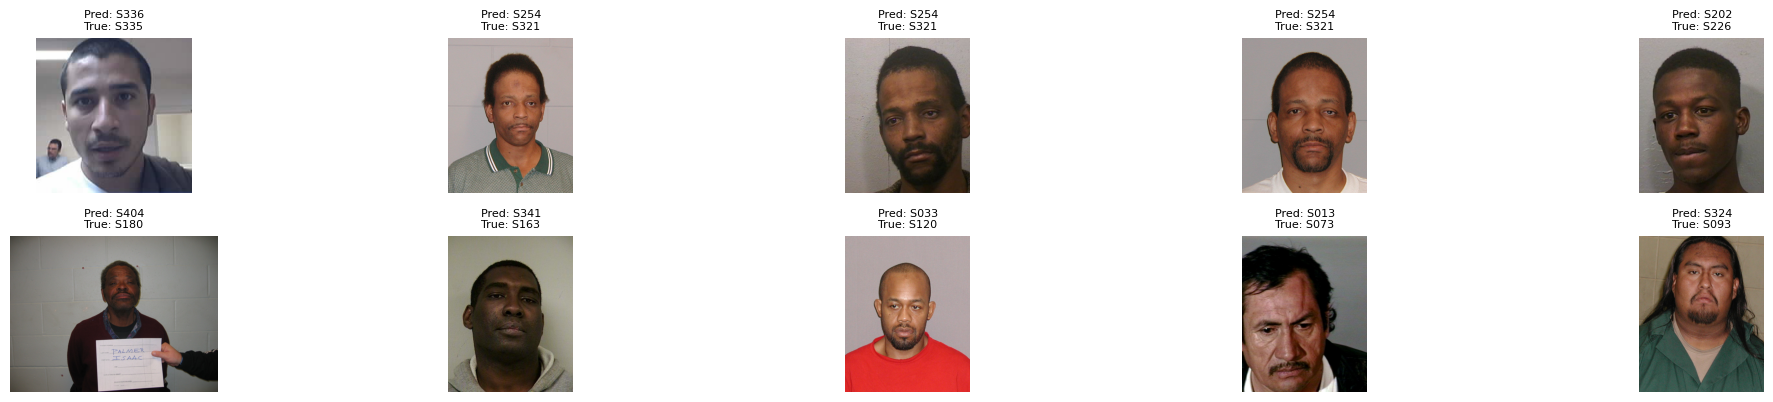

In [ ]:
# Deteksi gambar yang salah klasifikasi
misclassified_indices = np.where(y_val != y_val_pred)[0]

# Tampilkan gambar yang salah klasifikasi beserta prediksinya
plt.figure(figsize=(20, 20))
num_misclassified = len(misclassified_indices)
print(f"Total gambar yang salah klasifikasi: {num_misclassified}")

# Batasi jumlah gambar yang ditampilkan jika terlalu banyak
max_display = min(num_misclassified, 50)  # Menampilkan maksimal 50 gambar salah klasifikasi

for i in range(max_display):
    idx = misclassified_indices[i]
    plt.subplot(10, 5, i + 1)  # Membuat grid 10x5
    img = Image.open(image_paths[idx]).convert('RGB')
    plt.imshow(img)
    plt.title(f"Pred: {y_val_pred[idx]}\nTrue: {y_val[idx]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os

# Path ke folder validasi
val_folder_path = '/content/drive/My Drive/Colab Notebooks/nist_2/val/'

# Hitung jumlah semua gambar dengan ekstensi tertentu (misalnya .ppm)
total_images = 0
for root, dirs, files in os.walk(val_folder_path):
    image_files = [f for f in files if f.endswith('.ppm')]  # Ganti dengan ekstensi file gambar yang sesuai
    total_images += len(image_files)

print(f"Total jumlah gambar di '{val_folder_path}': {total_images}")

Total jumlah gambar di '/content/drive/My Drive/Colab Notebooks/nist_2/val/': 341
